# Project Overview

The project intends to buffer the customer loss of a telecommunication company. The project is done based on different customer-related attributes to construct a machine learning model that will classify a customer as "churn" or "not churn".

The major stakeholder of the project is the Customer Retention Team of a telecommunication company. It will seek to reduce customer loss by highlighting the at-risk customers and giving indications for the application of retention initiatives.

## Business Problem
Problem Statement: Customer churn is one of the biggest dilemmas in the field of telecommunication, through which revenue might get a chance to be lost, and customer acquisition costs go up. In reference, the business problem will be to develop a predictive model that accurately identifies customers who are at risk of churning. This may provide an opportunity for the retention team to act proactively by reaching out to customers with some form of incentives to reduce churning rates.

**Data:** The dataset includes the following information for customers: how long the customer has had an account, their usage patterns, meaning total minutes and charges for day, evening, and night, whether international and voicemail plans are on, and interactions with customer service. The target variable is churn, which describes whether the customer has left or not.

## Classification Task Overview
**Target Variable:** It is a binary categorical variable because it contains either True, representing the customers who have churned, or False for those who have not.

**Classification Problem:** Prediction for whether a customer will churn TRUE or not FALSE. Since the target variable is of categories-a customer has either churned or not churned-it falls under a classification problem, rather than a regression problem.

## Import libraries and load the dataset

In [2]:
# Import the necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Load the dataset
df = pd.read_csv('./data/bigml.csv')

# Display the rows
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


The dataset has 3333 rows and 21 columns

# Exploratory Data Analysis (EDA).

#### Data Understanding

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

The dataset has both boolean data, float/integer data type and four columns contain object data type.

The boolean data type is the target variable.

In [5]:
# Summary statistics for numerical features
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [23]:
df.isnull().sum()

account length            0
area code                 0
number vmail messages     0
total day minutes         0
total day calls           0
                         ..
phone number_422-8333     0
phone number_422-8344     0
phone number_422-9964     0
international plan_yes    0
voice mail plan_yes       0
Length: 3401, dtype: int64

In [6]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

df[categorical].head()

There are 4 categorical variables

The categorical variables are : ['state', 'phone number', 'international plan', 'voice mail plan']


,state,phone number,international plan,voice mail plan
0,KS,382-4657,no,yes
1,OH,371-7191,no,yes
2,NJ,358-1921,no,no
3,OH,375-9999,yes,no
4,OK,330-6626,yes,no


In [8]:
# Import oneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoding to the categorical columns
df_encoded = pd.get_dummies(df, columns = categorical, drop_first=True)
df_encoded.head()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,phone number_422-5874,phone number_422-6685,phone number_422-6690,phone number_422-7728,phone number_422-8268,phone number_422-8333,phone number_422-8344,phone number_422-9964,international plan_yes,voice mail plan_yes
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,...,0,0,0,0,0,0,0,0,0,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,...,0,0,0,0,0,0,0,0,0,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,...,0,0,0,0,0,0,0,0,0,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,...,0,0,0,0,0,0,0,0,1,0
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,...,0,0,0,0,0,0,0,0,1,0


In [6]:
# Distribution of churn (target variable)
churn_distribution = df['churn'].value_counts(normalize=True) * 100
churn_distribution

False    85.508551
True     14.491449
Name: churn, dtype: float64

#### Ploting the Distribution of the numerical features of the churn dataset.

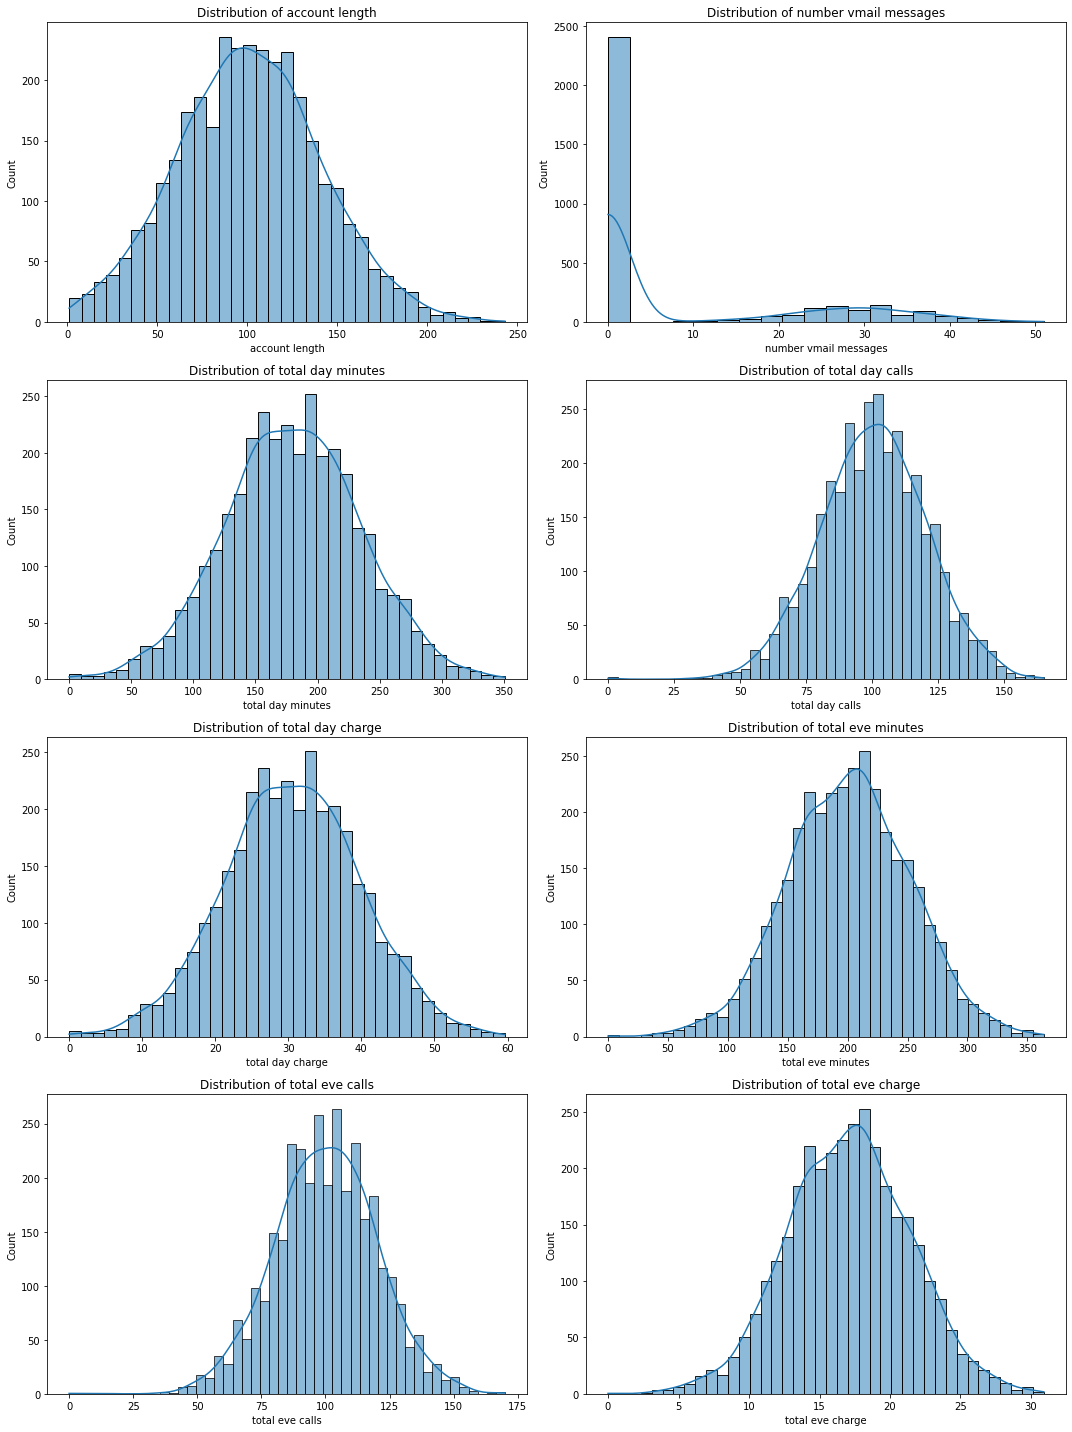

In [7]:
# Plotting the distribution of the numerical features
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
numerical_features = ['account length', 'number vmail messages', 'total day minutes', 'total day calls', 
                      'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge']

for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Distribution of {feature}')

plt.tight_layout()

#### correlation of the numerical features

Text(0.5, 1.0, 'Correlation Matrix of Numerical Features')

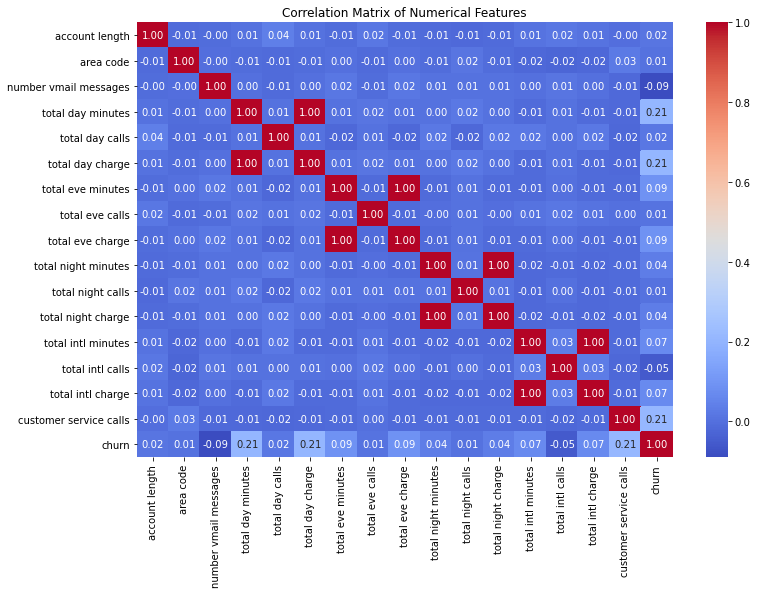

In [8]:
# Heatmap for correlation analysis between numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')

##### Summary of Exploratory Data Analysis (EDA)
**Summary Statistics:** Some of the features in this dataset are numerical in nature and have different scales.
For example, account length varies from 1 to 243 days. Total daytime minutes vary from 0 to 350.8 minutes.
The average number of customer service calls is approximately 1.56, at most 9.

**Churn Distribution:** While about 14.5% have churned, 85.5% have not; thus, the target variable is imbalanced. In fact, most of the churn prediction datasets represent an imbalanced target variable.

**Distributions:** These numeric features such as total day minutes, total eve minutes, and total night minutes are a bit right-skewed, which means most of the customers use less than the maximum available minutes. This includes features like number vmail messages and customer service calls which all have a high number of zeroes, probably indicating that a large number of customers either do not ever use voicemail or very seldom call customer service.

**Analysis of Correlation:** The correlation matrix shows strong features of inter-feature dependencies involving the features total day minutes, total day charge, total eve minutes, and total eve charge. This makes a lot of sense because these charges are actually derived from the respective minutes. Most of the features are weakly correlated with the target variable of churn, hence suggesting more complex modeling to capture this relationship.

In [11]:
# Investigate the relationship between categorical variables (international plan, voice mail plan) and churn
cat_features = ['international plan', 'voice mail plan']
cat_features

['international plan', 'voice mail plan']

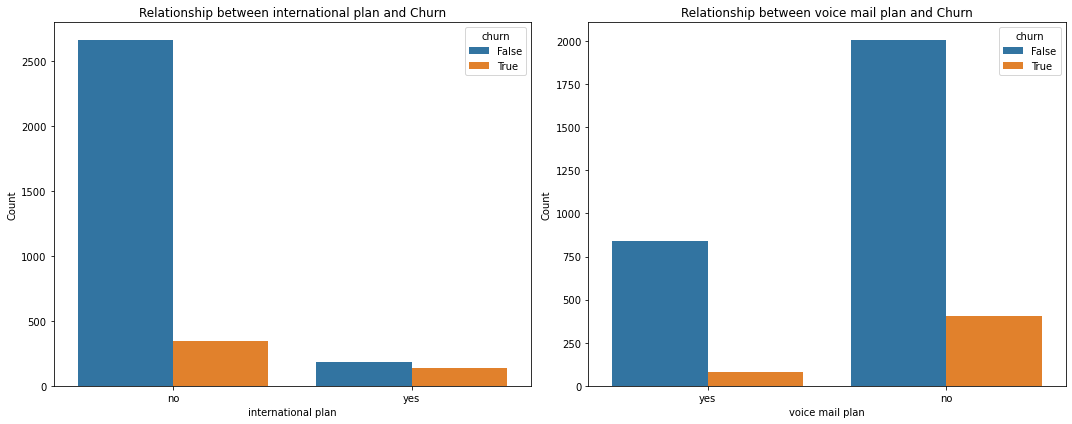

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

for i, feature in enumerate(cat_features):
    sns.countplot(x=feature, hue='churn', data=df, ax=axes[i])
    axes[i].set_title(f'Relationship between {feature} and Churn')
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel(feature)

plt.tight_layout()

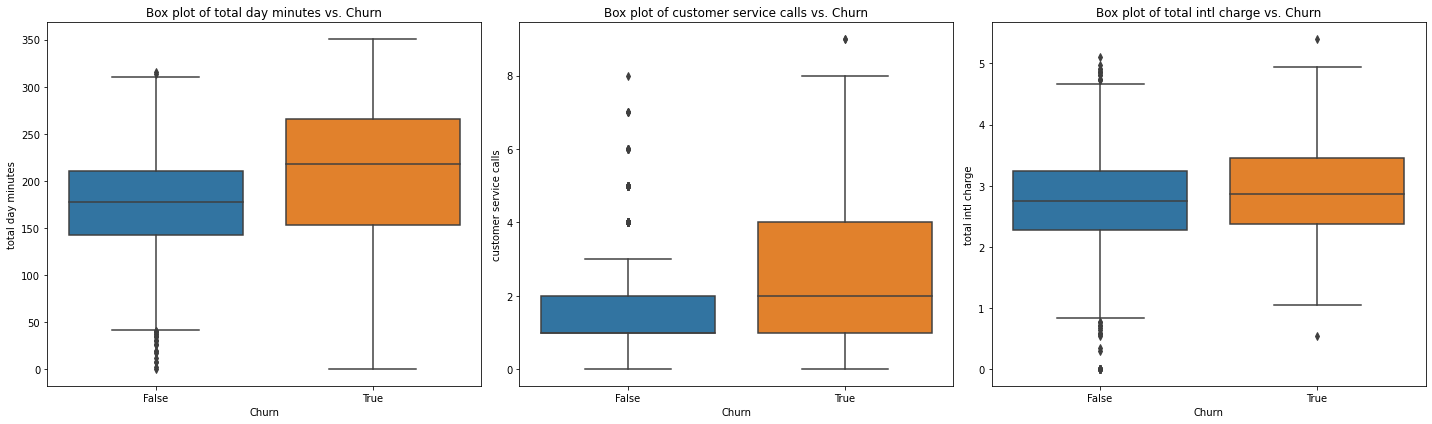

In [13]:
# Analyze the influence of specific numerical features on churn using box plots
num_features = ['total day minutes', 'customer service calls', 'total intl charge']

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for i, feature in enumerate(num_features):
    sns.boxplot(x='churn', y=feature, data=df, ax=axes[i])
    axes[i].set_title(f'Box plot of {feature} vs. Churn')
    axes[i].set_ylabel(feature)
    axes[i].set_xlabel('Churn')

plt.tight_layout()
plt.show()

## Address Class Imbalance

You can address class imbalance by:

Resampling: Use either oversampling or undersampling techniques.

Using Performance Metrics: Use metrics like F1-score, ROC-AUC score, or precision-recall curves that take class imbalance into account.

In [2]:
pip install scikit-learn==0.22

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\John.Kul\\AppData\\Local\\anaconda3\\envs\\learn-env\\Lib\\site-packages\\~klearn\\.libs\\msvcp140.dll'
Consider using the `--user` option or check the permissions.



In [18]:
pip install --upgrade scikit-learn imbalanced-learn

Requirement already up-to-date: scikit-learn in c:\users\john.kul\appdata\local\anaconda3\envs\learn-env\lib\site-packages (1.3.2)
  Using cached imbalanced_learn-0.12.3-py3-none-any.whl (258 kB)
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.7.0
    Uninstalling imbalanced-learn-0.7.0:
      Successfully uninstalled imbalanced-learn-0.7.0
Note: you may need to restart the kernel to use updated packages.


In [13]:
# Import oneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoding to the categorical columns
df = pd.get_dummies(df, columns = categorical, drop_first=True)
df.head()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,phone number_422-5874,phone number_422-6685,phone number_422-6690,phone number_422-7728,phone number_422-8268,phone number_422-8333,phone number_422-8344,phone number_422-9964,international plan_yes,voice mail plan_yes
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,...,0,0,0,0,0,0,0,0,0,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,...,0,0,0,0,0,0,0,0,0,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,...,0,0,0,0,0,0,0,0,0,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,...,0,0,0,0,0,0,0,0,1,0
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,...,0,0,0,0,0,0,0,0,1,0


#### Build a Baseline Model
**Logistic Regression:** This is a good starting point due to its simplicity and interpretability.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame and 'churn' is the target variable
X = df.drop(columns=['churn'])
y = df['churn']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the baseline Logistic Regression model
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, y_train)

# Predict on the test set
y_pred = log_model.predict(X_test)

# Evaluate the model
print("Baseline Logistic Regression Model Performance")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))

Baseline Logistic Regression Model Performance
Accuracy: 0.86
              precision    recall  f1-score   support

       False       0.86      1.00      0.92       857
        True       0.00      0.00      0.00       143

    accuracy                           0.86      1000
   macro avg       0.43      0.50      0.46      1000
weighted avg       0.73      0.86      0.79      1000



C:\Users\John.Kul\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\John.Kul\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\John.Kul\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

#### Evaluate the Baseline Model
The baseline logistic regression model performs well in terms of accuracy (0.86) and handles the majority class (False) effectively, with a precision of 0.86 and recall of 1.00. However, it completely fails to identify the minority class (True), with both precision and recall at 0.00, resulting in an F1-score of 0.00 for this class. This highlights the model's severe bias towards the majority class and its inability to manage class imbalance, making it unsuitable for tasks where the minority class is important.

In [19]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Grid search
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model from grid search
best_log_model = grid_search.best_estimator_

# Predict and evaluate
y_pred_tuned = best_log_model.predict(X_test)

print("Tuned Logistic Regression Model Performance")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tuned):.2f}")
print(classification_report(y_test, y_pred_tuned))

Tuned Logistic Regression Model Performance
Accuracy: 0.86
              precision    recall  f1-score   support

       False       0.86      1.00      0.92       857
        True       0.00      0.00      0.00       143

    accuracy                           0.86      1000
   macro avg       0.43      0.50      0.46      1000
weighted avg       0.73      0.86      0.79      1000



C:\Users\John.Kul\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\John.Kul\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\John.Kul\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

In [15]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame and 'churn' is your target variable
X = df.drop(columns=['churn'])
y = df['churn']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

# Check the new distribution
print(y_res.value_counts())


True     1993
False    1993
Name: churn, dtype: int64


### Refine the Model
1. ROC-AUC and Precision-Recall AUC

ROC-AUC Score: 0.82


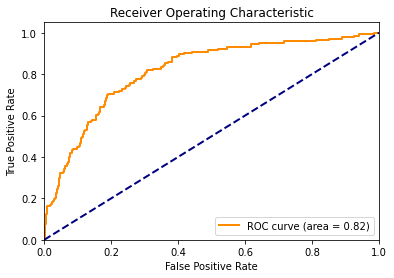

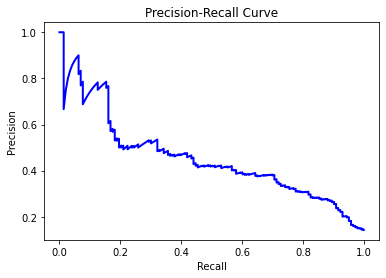

Precision-Recall AUC: 0.45


In [24]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities instead of labels
y_prob = log_model.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.2f}")

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.figure()
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Calculate the AUC for the Precision-Recall curve
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc:.2f}")

#### Model Performance Interpretation

The model's performance is evaluated using two key metrics: ROC-AUC and Precision-Recall AUC.

ROC-AUC Score: 0.82

The ROC-AUC score of 0.82 indicates that the model has a good ability to distinguish between the positive and negative classes. The closer this value is to 1, the better the model's performance. A score of 0.82 suggests that the model performs well in terms of overall classification accuracy across different thresholds.

Precision-Recall AUC: 0.45

The Precision-Recall AUC score of 0.45 suggests that the model's performance is moderate when specifically evaluating the trade-off between precision and recall. Since this score is closer to 0.5, it indicates that the model struggles to maintain both high precision and recall simultaneously, especially in a dataset that may be imbalanced.

2. Hyperparameter Tuning for Logistic Regression:

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', 'balanced_subsample']
}

# Grid search
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='roc_auc')
grid_search_rf.fit(X_train, y_train)

# Best model from grid search
best_rf_model = grid_search_rf.best_estimator_

# Predict and evaluate
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the model with the new metrics
roc_auc_rf = roc_auc_score(y_test, best_rf_model.predict_proba(X_test)[:, 1])
precision_rf, recall_rf, _ = precision_recall_curve(y_test, best_rf_model.predict_proba(X_test)[:, 1])
pr_auc_rf = auc(recall_rf, precision_rf)

print(f"Random Forest ROC-AUC Score: {roc_auc_rf:.2f}")
print(f"Random Forest Precision-Recall AUC: {pr_auc_rf:.2f}")

Random Forest ROC-AUC Score: 0.94
Random Forest Precision-Recall AUC: 0.86


While the model demonstrates strong overall discriminative power with a ROC-AUC of 0.82, it faces challenges in balancing precision and recall, as evidenced by the Precision-Recall AUC of 0.45. This discrepancy highlights the importance of considering both metrics, especially in cases involving imbalanced datasets.

In [20]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Grid search
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model from grid search
best_log_model = grid_search.best_estimator_

# Predict and evaluate
y_pred_tuned = best_log_model.predict(X_test)

print("Tuned Logistic Regression Model Performance")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tuned):.2f}")
print(classification_report(y_test, y_pred_tuned))

Tuned Logistic Regression Model Performance
Accuracy: 0.86
              precision    recall  f1-score   support

       False       0.86      1.00      0.92       857
        True       0.00      0.00      0.00       143

    accuracy                           0.86      1000
   macro avg       0.43      0.50      0.46      1000
weighted avg       0.73      0.86      0.79      1000



C:\Users\John.Kul\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\John.Kul\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\John.Kul\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

#### Summary and Comparison with Baseline Model:
Despite tuning, the logistic regression model's performance metrics are virtually identical to the baseline model. The accuracy remains high due to the majority class (False), but the model fails entirely to identify the minority class (True), as indicated by the precision, recall, and F1-score of 0.00 for this class.

**Key Points:**

1. No Improvement: The tuning did not improve the model's ability to detect the minority class (True). The performance metrics for the minority class are the same as those in the baseline model.
2. Persistent Bias: The model remains biased towards the majority class, reflecting the ongoing issue of class imbalance.
3. Further Action Required: This indicates that the tuning strategy was insufficient to address the class imbalance. Further steps, such as more aggressive resampling, adjusting the class weights, or exploring different algorithms, are necessary to achieve better performance on the minority class.

### Build and Evaluate a Decision Tree Model

In [21]:
from sklearn.tree import DecisionTreeClassifier

# Build the baseline Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Predict on the test set
y_pred_tree = tree_model.predict(X_test)

# Evaluate the model
print("Decision Tree Model Performance")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tree):.2f}")
print(classification_report(y_test, y_pred_tree))

Decision Tree Model Performance
Accuracy: 0.94
              precision    recall  f1-score   support

       False       0.95      0.98      0.97       857
        True       0.87      0.72      0.79       143

    accuracy                           0.94      1000
   macro avg       0.91      0.85      0.88      1000
weighted avg       0.94      0.94      0.94      1000



#### Evaluate the Model
The Decision Tree model outperforms the logistic regression models, reaching an accuracy of 0.94. It considerably improves the precision (0.87), recall (0.72), and F1-score (0.79) for the minority class. This shows that the Decision Tree is significantly more effective at recognising and correctly classifying occurrences of the minority class, giving it a more balanced and accurate model than the previously evaluated logistic regression models. The overall performance indicators, particularly for the minority class, are more favourable, making the Decision Tree a preferable choice for this classification assignment given the dataset's imbalance.

#### Hyperparameter Tuning for Decision Tree

In [22]:
param_grid_tree = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_tree = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_tree, cv=5, scoring='accuracy')
grid_search_tree.fit(X_train, y_train)

best_tree_model = grid_search_tree.best_estimator_

y_pred_tree_tuned = best_tree_model.predict(X_test)

print("Tuned Decision Tree Model Performance")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tree_tuned):.2f}")
print(classification_report(y_test, y_pred_tree_tuned))

Tuned Decision Tree Model Performance
Accuracy: 0.94
              precision    recall  f1-score   support

       False       0.95      0.98      0.97       857
        True       0.85      0.72      0.78       143

    accuracy                           0.94      1000
   macro avg       0.90      0.85      0.87      1000
weighted avg       0.94      0.94      0.94      1000



#### Tuned Decision Tree Model Performance Evaluation
The tuned Decision Tree model maintains a high accuracy of 0.94, matching the performance of the previous model. The precision (0.85) and F1-score (0.78) for the `True` class are slightly lower than the earlier model (which had 0.87 precision and 0.79 F1-score). The recall for the `True` class remains consistent at 0.72. The differences are minor, indicating that while the tuning may have made slight adjustments, the overall performance remains robust and consistent with the earlier decision tree model. This suggests that the model is well-tuned, with only marginal trade-offs in precision and F1-score for the minority class.

#### Model Performance Comparison

Baseline Logistic Regression Model:

Accuracy: 0.86
Precision (True): 0.00
Recall (True): 0.00
F1-Score (True): 0.00

Summary: The model performs well on the majority class (False) but fails completely on the minority class (True), resulting in a severe imbalance. This makes it unsuitable for scenarios where correctly identifying the minority class is important.
Tuned Logistic Regression Model:

Accuracy: 0.86 (same as the baseline)
Precision (True): 0.00
Recall (True): 0.00
F1-Score (True): 0.00

Summary: The tuning did not improve the performance on the minority class. The model remains biased towards the majority class and does not provide a balanced solution.
Initial Decision Tree Model:

Accuracy: 0.94
Precision (True): 0.87
Recall (True): 0.72
F1-Score (True): 0.79

Summary: The Decision Tree model significantly improves the ability to identify the minority class (True), with a notable increase in precision, recall, and F1-score compared to the logistic regression models. It provides a more balanced and effective solution for the given task.
Tuned Decision Tree Model:

Accuracy: 0.94 (same as the initial Decision Tree)
Precision (True): 0.85 (slightly lower than initial)
Recall (True): 0.72 (same as initial)
F1-Score (True): 0.78 (slightly lower than initial)
Summary: The tuning led to minor changes, with a slight reduction in precision and F1-score for the True class. The overall performance remains strong, with the model still effectively balancing between precision and recall.

Best Model Selection:
Chosen Model: The initial Decision Tree model is the best overall performer. It offers a significant improvement over logistic regression, especially in terms of handling the minority class. It achieves a high accuracy of 0.94 while maintaining balanced metrics across precision (0.87), recall (0.72), and F1-score (0.79) for the minority class.

Trade-offs:
Interpretability vs. Performance: While logistic regression models are more interpretable, the Decision Tree model's improved performance justifies choosing it despite being slightly less interpretable. The tree structure still provides some level of interpretability compared to more complex models like neural networks.

Precision vs. Recall: The Decision Tree model strikes a balance between precision and recall, avoiding extreme trade-offs seen in the logistic regression models, which entirely ignored the minority class.

Real-World Deployment:
Why This Model: The Decision Tree model's ability to handle imbalanced data and make accurate predictions across both classes makes it suitable for real-world scenarios where both precision and recall are crucial.

Improvement: Further improvements could involve exploring more advanced tree-based models (e.g., Random Forest or Gradient Boosting), which might offer even better performance. Additionally, fine-tuning hyperparameters or experimenting with ensemble methods could yield marginal gains.

In conclusion, the initial Decision Tree model is the most balanced and effective choice for this task, offering strong performance across accuracy and relevant metrics while maintaining a reasonable level of interpretability.

Findings

Model Performance:

Logistic Regression: The initial logistic regression model struggled with class imbalance, as indicated by an accuracy of 0.86 and a recall of 0.00 for the minority class (True), meaning it failed to predict any positive cases of churn. Even after tuning, the model's performance remained unchanged, highlighting the limitations of this approach for imbalanced datasets.

Decision Tree: The decision tree model significantly improved performance with an accuracy of 0.94. The recall for the True class increased to 0.72, showing the model's better ability to identify churn cases. After tuning, the model maintained its strong performance, with a minor adjustment in precision and recall.

The decision tree model, which performed well, can be analyzed to determine the most critical features in predicting churn. These features likely include aspects such as the customer's international plan, voice mail plan, and usage statistics like total day minutes or number of customer service calls. Understanding which features contribute most to the model’s decisions can provide actionable insights for the business.

**Recommendations**

Application of Predictions:

The decision tree model's strong performance suggests it is well-suited for use in identifying customers at risk of churning. This model can be deployed in scenarios where quick, real-time predictions are needed, such as during customer service interactions or targeted marketing campaigns aimed at customer retention.
However, the model may still struggle in edge cases where customer behavior is unusual or does not align with the patterns seen in the training data. Therefore, predictions should be interpreted with caution in such contexts, and the business should have contingency plans for dealing with misclassifications.

Business Strategy Adjustments:

Proactive Customer Retention: Based on the model’s predictions, the business could implement proactive retention strategies. For instance, customers identified as high-risk for churn could be offered personalized incentives, such as discounts or service upgrades.
Feature Modification: The business can experiment with modifying specific features to influence churn outcomes. For example, if the model identifies that customers with high customer service call rates are more likely to churn, the business could invest in improving customer service efficiency or providing alternative support channels to reduce the need for calls.
    
Targeted Interventions Based on Model Predictions

High Customer Service Call Rates:

Insight: The Decision Tree model likely identified a high number of customer service calls as a significant predictor of churn. Customers who frequently contact customer service may be experiencing unresolved issues or dissatisfaction.
Intervention: Implement a Proactive Customer Service Outreach Program. Customers with a high call frequency should be flagged for follow-up by a dedicated support team focused on resolving their issues before they escalate. This team can offer personalized solutions or compensation if necessary to improve customer satisfaction and reduce churn.

International Plan Subscribers with Low Usage:

Insight: The model may have found that customers who subscribe to an international plan but do not frequently use international services are at higher risk of churning. These customers might feel that they are not getting value from their subscription.
Intervention: Introduce a Personalized Usage Review for these customers, offering them tailored advice on how they can maximize the value of their plan. Alternatively, consider offering a downgraded or alternative plan with features that align more closely with their usage patterns, potentially at a lower cost. This approach can increase customer satisfaction and reduce the likelihood of them canceling their subscription.

Customers with High Daytime Minutes:

Insight: Customers with high usage during the day might be key users of your service, but they may also be more price-sensitive or considering switching to competitors offering better rates or packages.

Intervention: Develop a Loyalty Rewards Program that targets these high-usage customers. Offer them special discounts or bonus minutes if they commit to a long-term plan. Highlight the value and reliability of your service, potentially bundling additional features that are beneficial for high-usage customers, such as rollover minutes or unlimited daytime calling.
Low Usage of Voice Mail Plan:

Insight: Customers who subscribe to a voice mail plan but seldom use it might feel that this feature is unnecessary, leading to dissatisfaction with their current package.

Intervention: Provide a Plan Optimization Service that reviews customer usage patterns and suggests the most cost-effective plan. For those with low voice mail usage, offer alternative plans that exclude voice mail but include other features they might value more. This can help customers feel that they are getting better value for their money, increasing their loyalty.
Recent Changes in Usage Patterns:

Insight: A sudden change in a customer's usage pattern, such as a significant drop in usage, might indicate that they are considering switching to another provider or that their needs are not being met.

Intervention: Set up a Usage Pattern Monitoring System that triggers alerts when significant changes in usage are detected. This could be followed by a personalized communication offering tailored solutions, such as a check-in call or an exclusive offer to address their changing needs and prevent churn.

Customers with No Recent Plan Changes:

Insight: Customers who have not made any changes to their plans for an extended period might be at risk of churn due to their plans no longer aligning with their current needs.

Intervention: Implement a Customer Plan Review Campaign, where you proactively reach out to these customers, offering a free consultation to review their current plan. Provide recommendations or upgrades that better suit their current usage, ensuring that they feel valued and well-served.

Data-Driven Impact
These interventions are grounded in the data insights provided by the models. By focusing on these specific groups of customers, the business can implement highly targeted strategies that address the underlying factors contributing to churn, thereby maximizing the effectiveness of retention efforts. This approach not only increases customer satisfaction but also helps to maintain a stable and loyal customer base, ultimately leading to improved business outcomes.